# CH274: Computational Assignment No. 2:

## Data Fitting

<div class="alert alert-block alert-info">
In this assignment, you will need to apply the methods developed in your Python key skills workshops (using Numpy to read in .csv files, and data plotting) and the CH274 spectral fitting workshop. You will be asked to do the following:
    
* **Task 1:** Fit a simulated IR absorption spectrum as a sum of Gaussian functions
* **Task 2:** Simultaneously fit four kinetic traces to a supplied set of rate equations
* **Task 3:** Determine quantum yields using the results of Task 2
    
    
</div>

<div class="alert alert-block alert-danger">
    <b> PLEASE NOTE</b>
    
* **Do not copy this notebook!** Work directly in it.
* **Do not rename this notebook!** If you do, you won't be able to submit it.
* **Do not copy any of the special grading cells.** If you need additional cells, create new ones with the + button
* Enter code in prepared code cells. Enter discussion text and answers into prepared text cells
    
 At the end, you should submit a notebook that:
* is complete
* has functioning code, which can be executed from beginning to end
* x and y axes of the plots should be labeled
* when executed, the notebook generates all the requested data, plots, etc.
    
    </div>

## Your dataset
Here are the most important import statements you might need. Don't forget to execute this cell!

In [1]:
from plotGen import spectrum,kinetics
import matplotlib.pyplot as plt
import numpy as np

<div class="alert alert-block alert-info">

**ATTENTION** 

The following cell will generate your simulated spectral and kinetic data. You have to insert your **student id number**. When the cell is run, the function will generate a preview of your two personalised data sets, and will be saved as .csv files (you will need to import these .csv files yourself before you can do any fitting). 
    
Do not change the code in the following cell. Only insert your student ID where it says 
    
        <INSERT ID HERE>
</div>

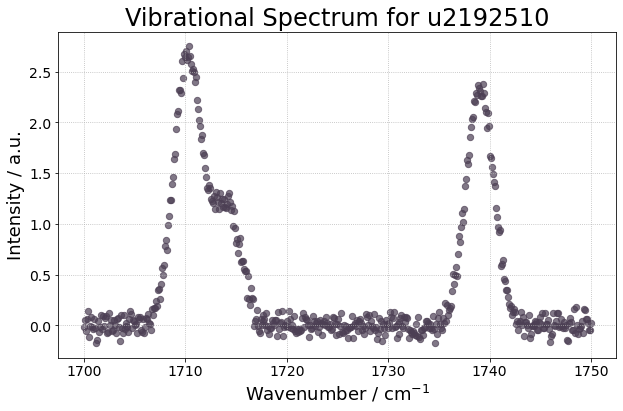

File saved as '2192510_spectrum.csv'


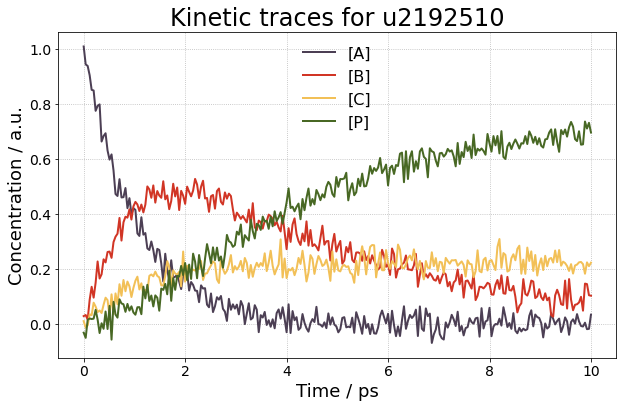

File saved as '2192510_kineticTraces.csv'


In [2]:
###PLEASE INSERT YOUR STUDENT ID
#e.g. my_student_id = 1234567
my_student_id = 2192510

#Generates vibrational spectrum
spectrum(my_student_id)
print("File saved as '{}_spectrum.csv'".format(my_student_id))

#Generates kinetic traces
kinetics(my_student_id)
print("File saved as '{}_kineticTraces.csv'".format(my_student_id))

<div class="alert alert-block alert-info">

## Task 1: Fitting spectral data

The simulated vibrational spectrum comprises three peaks, each of which may be fit using a Gaussian function of the form:

$$y(x)=A\exp\left\{-\left(\frac{x-x_{c}}{w}\right)^2\right\}$$

Where $A$ is the height of the Gaussian, $x_{c}$ is the wavenumber value of the Gaussian's centre, and $w$ is its width. To simplify things, we can assume that all three Gaussians will have identical width.  

Using the techniques developed in the CH274 data fitting workshop, write a function which will fit all three peaks in your spectrum. Report the best fit values and one standard deviation uncertainties for the three peak intensities, three peak centres, and the peak width (seven fit-parameters in all). Include a correctly formatted plot containing both the raw 'data' and the line of best fit.
    
</div>

In [3]:
#INSERT CODE HERE
#define function of 3 gaussian peaks 
def IR3peak(x,xc1,w,a1,xc2,a2,xc3,a3):
        return (a1*np.exp(-(((x-xc1)/w)**2)))+(a2*np.exp(-(((x-xc2)/w)**2)))+(a3*np.exp(-(((x-xc3)/w)**2)))

I defined this function as a sum of 3 gaussian functions, each for a peak in my data, and will be as the function to fit the data points.

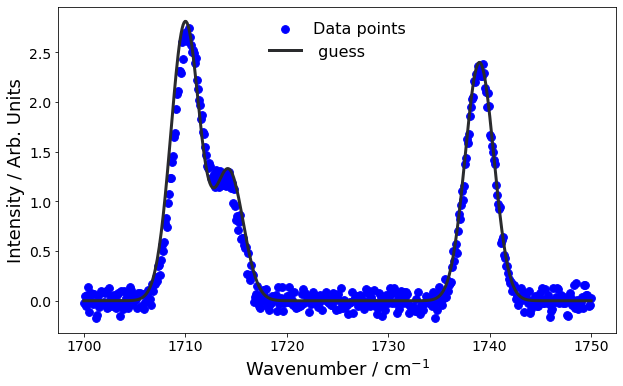

In [11]:
#INSERT CODE HERE
#trial 
data=np.loadtxt("./2192510_spectrum.csv", delimiter=',', skiprows=1)
wavenumber=data[:,0]
intensity=data[:,1]
x=wavenumber 
guessno=[1710,2,2.8,1714.3,1.3,1739,2.4]
guessy=(guessno[2]*np.exp(-(((x-guessno[0])/guessno[1])**2)))+(guessno[4]*np.exp(-(((x-guessno[3])/guessno[1])**2)))+(guessno[6]*np.exp(-(((x-guessno[5])/guessno[1])**2)))

plt.figure(figsize=(10,6))
plt.scatter(wavenumber,intensity,s=60, c='blue',label='Data points')
plt.plot(wavenumber,guessy,lw=3,c='#2A2B2D', label=' guess')
plt.xlabel("Wavenumber / cm$^{-1}$", fontsize=18)
plt.ylabel("Intensity / Arb. Units", fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()

I used loadtxt to import the spectra data. I assigned the first column as wavenumber and second as intensity. I then made some guess parameters based on the height width and centre of all the peaks (in order from left to right). a guess intensity was calculated using the sum of 3 gaussian functions and the guess parameters. This was plotted, along with the original data in the form of scatter graph, against the wavenumber to see how good the guesses are.

a1=2.671, 1 S.D. uncertainty=0.0167
xc1=1710.230 cm^-1, 1 S.D. uncertainty=0.012 cm^-1
w=1.910 cm^-1, 1 S.D. uncertainty=0.011 cm^-1
a2=1.183, 1 S.D. uncertainty=0.02
xc2=1714.034 cm^-1, 1 S.D. uncertainty=0.027 cm^-1
a3=2.351, 1 S.D. uncertainty=0.015
xc3=1739.015 cm^-1, 1 S.D. uncertainty=0.011 cm^-1


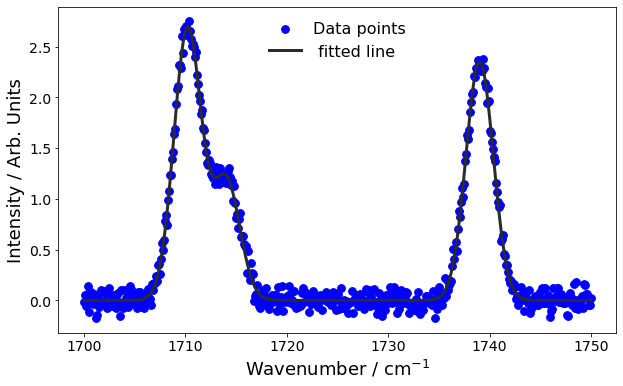

In [12]:
#INSERT CODE HERE
from scipy.optimize import curve_fit
popt,pcov=curve_fit(IR3peak, wavenumber, intensity,guessno)
yfit=(popt[2]*np.exp(-(((x-popt[0])/popt[1])**2)))+(popt[4]*np.exp(-(((x-popt[3])/popt[1])**2)))+(popt[6]*np.exp(-(((x-popt[5])/popt[1])**2)))
plt.figure(figsize=(10,6))
plt.scatter(wavenumber,intensity,s=60, c='blue',label='Data points')
plt.plot(wavenumber,yfit,lw=3,c='#2A2B2D', label=' fitted line')
plt.xlabel("Wavenumber / cm$^{-1}$", fontsize=18)
plt.ylabel("Intensity / Arb. Units", fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

Error=np.sqrt(np.diag(pcov))
print("a1={:4.3f}, 1 S.D. uncertainty={:4.3}".format(popt[2],Error[2]))
print("xc1={:4.3f} cm^-1, 1 S.D. uncertainty={:4.3f} cm^-1".format(popt[0],Error[0]))
print("w={:4.3f} cm^-1, 1 S.D. uncertainty={:4.3f} cm^-1".format(popt[1],Error[1]))
print("a2={:4.3f}, 1 S.D. uncertainty={:4.2f}".format(popt[4],Error[4]))
print("xc2={:4.3f} cm^-1, 1 S.D. uncertainty={:4.3f} cm^-1".format(popt[3],Error[3]))
print("a3={:4.3f}, 1 S.D. uncertainty={:4.3f}".format(popt[-1],Error[-1]))
print("xc3={:4.3f} cm^-1, 1 S.D. uncertainty={:4.3f} cm^-1".format(popt[-2],Error[-2]))

plt.show()

Here the import curve_fit was used to find the best guess values to fit the curve and did this by using the function I created and the data along with the guess values. Then the newfound guess values were used to make a new line called yfit by putting them in the gaussian function. It was then plotted against wavefunction along with the original data (again in scatter) to finally fit the data the line. Error was found by taking the diagonal of the pcov matrix and square rooting it. all data is to 3 d.p 

<div class="alert alert-block alert-info">

## Task 2: Simultaneous fit of kinetic data

The kinetic data simulates a situation where an initially excited state, A, can decay by two parallel pathways; internal conversion (IC) back down to the ground electronic state, C, (with rate coefficient $k_{\textrm{IC}}$), or isomerisation of the parent molecule to form B (with rate coefficient $k_{\textrm{isom}}$). Isomer B subsequently undergoes dissociation (rate coefficient $k_{\textrm{diss}}$) to form a product molecule, P. The overall kinetic scheme is therefore:
<img src="./KinScheme.png" width="200" style="border:1px solid black">


If we assume that at time $t=0$, $[A]=[A]_{0}=1$ (arbitrary units), and the initial concentrations of the other species (<i>i.e.</i> $[B]_{0}$, $[C]_{0}$, and $[P]_{0}$) are all $0$, then the time dependent populations of the four molecules are described by the following equations:<br>
<p class="big">
$$[A]_{t}=e^{-(k_{\textrm{IC}}+k_{\textrm{isom}})t}$$<br>


$$[B]_{t}=\frac{\left\{e^{-\left(k_{\textrm{IC}}+k_{\textrm{isom}}\right)t}-e^{-k_{\textrm{diss}}t}\right\}k_{\textrm{isom}}}{k_{\textrm{diss}}-k_{\textrm{IC}}-k_{\textrm{isom}}}$$<br>



$$[C]_{t}=\frac{\left\{1-e^{-\left(k_{\textrm{IC}}+k_{\textrm{isom}}\right)t}\right\}k_{\textrm{IC}}}{k_{\textrm{IC}}+k_{\textrm{isom}}}$$<br>

$$[P]_{t}=\frac{\left\{k_{\textrm{IC}}+k_{\textrm{isom}}-k_{\textrm{diss}}-\left(k_{\textrm{IC}}+k_{\textrm{isom}}\right)e^{-k_{\textrm{diss}}t}+k_{\textrm{diss}}e^{-\left(k_{\textrm{IC}}+k_{\textrm{isom}}\right)t}\right\}k_{\textrm{isom}}}{\left(k_{\textrm{IC}}+k_{\textrm{isom}}\right)\left(k_{\textrm{IC}}+k_{\textrm{isom}}-k_{\textrm{diss}}\right)}$$<br>
</p>
Fit the four kinetic traces simultaneously and extract the global best-fit values for $k_{IC},\,k_{isom}$, and $k_{diss}$ and their associated one standard deviation errors. Include a correctly formatted plot of both the raw 'data' and the lines of best fit.
    
</div>

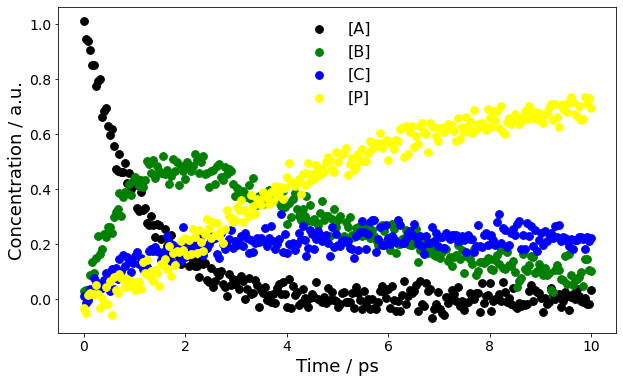

In [6]:
#INSERT CODE HERE
data=np.loadtxt('./2192510_kineticTraces.csv',delimiter=',',skiprows=1)
t=data[:,0]
concA=data[:,1]
concB=data[:,2]
concC=data[:,3]
concP=data[:,4]
plt.figure(figsize=(10,6))

plt.scatter(t,concA,s=60,c='black',label='[A]')
plt.scatter(t,concB,s=60,c='green',label='[B]')
plt.scatter(t,concC,s=60,c='blue',label='[C]')
plt.scatter(t,concP,s=60,c='yellow',label='[P]')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / ps',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()


here I imported the data like in task 1 and plotted concs of ABCP against time.

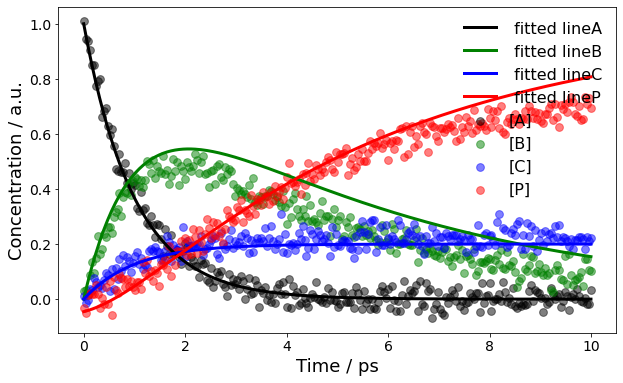

In [7]:
#INSERT CODE HERE
def funcA(t,kic,kisom):
    return np.exp(-(kic+kisom)*t)
def funcB(t,kic,kisom,kdiss):
    return((np.exp(-(kic+kisom)*t)-np.exp(-kdiss*t))*kisom)/(kdiss-kic-kisom)
def funcC(t,kic,kisom):
    return ((1-np.exp(-(kic+kisom)*t))*kic)/(kic+kisom)
def funcP(t,kic,kisom,kdiss):
    return ((kic+kisom-kdiss)-((kic+kisom)*np.exp(-kdiss*t))+(kdiss*np.exp(-(kic+kisom)*t))*kisom)/((kic+kisom)*(kic+kisom-kdiss))
# kic   kisom   kdiss
guessno=[0.2,0.8,0.185]
guesslineA=np.exp(-(guessno[0]+guessno[1])*t)
guesslineB=((np.exp(-(guessno[0]+guessno[1])*t)-np.exp(-guessno[2]*t))*guessno[1])/(guessno[2]-guessno[0]-guessno[1])
guesslineC=((1-np.exp(-(guessno[0]+guessno[1])*t))*guessno[0])/(guessno[0]+guessno[1])
guesslineP=((guessno[0]+guessno[1]-guessno[2])-((guessno[0]+guessno[1])*np.exp(-guessno[2]*t))+(guessno[2]*np.exp(-(guessno[0]+guessno[1])*t))*guessno[1])/((guessno[0]+guessno[1])*(guessno[0]+guessno[1]-guessno[2]))

plt.figure(figsize=(10,6))

plt.plot(t,guesslineA,lw=3,c='black', label=' fitted lineA')
plt.plot(t,guesslineB,lw=3,c='green', label=' fitted lineB')
plt.plot(t,guesslineC,lw=3,c='blue', label=' fitted lineC')
plt.plot(t,guesslineP,lw=3,c='red', label=' fitted lineP')

plt.scatter(t,concA,s=60,c='black',alpha=0.5,label='[A]')
plt.scatter(t,concB,s=60,c='green',alpha=0.5,label='[B]')
plt.scatter(t,concC,s=60,c='blue',alpha=0.5,label='[C]')
plt.scatter(t,concP,s=60,c='red',alpha=0.5,label='[P]')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / ps',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)

plt.show()



Here i defined 4 functions one for each concentration and used guess values for kic kdiss and kisom to calculate guess concs for ABCP and plotted then against time along with the data just like task 1. I kept chnaging the guess values until I was happy with the initial fit. By using some maths i worked out kic and kisom roughly add to 1 and that kic=0.2 as well. This was calculated by subbing in numbers the conc A equation to get kisom+kic=1 so the conc c equation can be simplified to just the numerator. conc c levels out at 0.2 so kic must be 0.2 due to the main exponential function being times by kic (vertical compression of y values). After more guessing with kdiss the lines loosely follow the data.

[0.28004483 0.93983093 0.23577414]


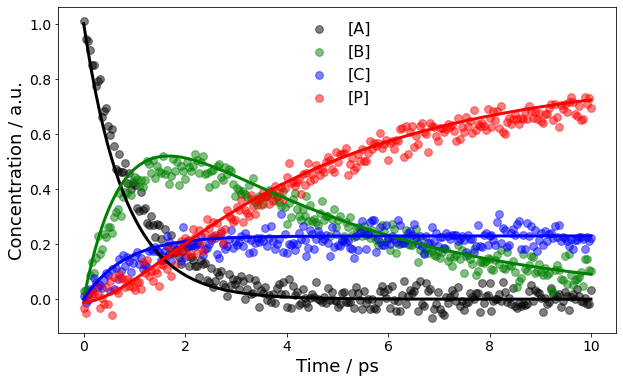

kic=0.280 ps^-1, 1 S.D uncertainty=0.003 ps^-1
kisom=0.940 ps^-1, 1 S.D uncertainty=0.007 ps^-1
kdiss=0.236 ps^-1, 1 S.D uncertainty=0.002 ps^-1


In [8]:
# INSERT CODE HERE
concABCP=np.concatenate((concA,concB,concC,concP))
timeABCP=np.concatenate((t,t,t,t))
def simFit(combinedTimeData,kic,kisom,kdiss):
    
    time_A=combinedTimeData[0:len(concA)] 
    time_B=combinedTimeData[len(concA):2*len(concA)] 
    time_C=combinedTimeData[2*len(concA):3*len(concA)]
    time_P=combinedTimeData[3*len(concA):4*len(concA)]
   
    result1=funcA(time_A,kic,kisom)
    result2=funcB(time_B,kic,kisom,kdiss)
    result3=funcC(time_C,kic,kisom)
    result4=funcP(time_P,kic,kisom,kdiss)
    
    return np.concatenate((result1,result2,result3,result4))
popt,pcov=curve_fit(simFit,timeABCP,concABCP,guessno)
print(popt)
simfitA=np.exp(-(popt[0]+popt[1])*t)
simfitB=((np.exp(-(popt[0]+popt[1])*t)-np.exp(-popt[2]*t))*popt[1])/(popt[2]-popt[0]-popt[1])
simfitC=((1-np.exp(-(popt[0]+popt[1])*t))*popt[0])/(popt[0]+popt[1])
simfitP=((popt[0]+popt[1]-popt[2])-((popt[0]+popt[1])*np.exp(-popt[2]*t))+(popt[2]*np.exp(-(popt[0]+popt[1])*t))*popt[1])/((popt[0]+popt[1])*(popt[0]+popt[1]-popt[2]))

plt.figure(figsize=(10,6))
plt.scatter(t,concA,s=60,c='black',alpha=0.5,label='[A]')
plt.plot(t,simfitA,lw=3,c='black')
plt.scatter(t,concB,s=60,c='green',alpha=0.5,label='[B]')
plt.plot(t,simfitB,lw=3,c='green')
plt.scatter(t,concC,s=60,c='blue',alpha=0.5,label='[C]')
plt.plot(t,simfitC,lw=3,c='blue')
plt.scatter(t,concP,s=60,c='red',alpha=0.5,label='[P]')
plt.plot(t,simfitP,lw=3,c='red')

#add axis labels and a plot legend, and make the font larger
plt.xlabel('Time / ps',fontsize=18) 
plt.ylabel('Concentration / a.u.',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(frameon=False,fontsize=16)
plt.show()
err=np.sqrt(np.diag(pcov))
print('kic={:4.3f} ps^-1, 1 S.D uncertainty={:4.3f} ps^-1'.format(popt[0],err[0]))
print('kisom={:4.3f} ps^-1, 1 S.D uncertainty={:4.3f} ps^-1'.format(popt[1],err[1]))
print('kdiss={:4.3f} ps^-1, 1 S.D uncertainty={:4.3f} ps^-1'.format(popt[2],err[2]))

the conc and time was grouped together so the line can be fit simultaneously. A function was then made to split the time into time ABCP and use the funcABCP functions to find the concs of ABCP from the group data simultaneously. This function can be used along with the data and guess parameters to find the best parameters for it using curve_fit instead of doing it 4 times with the 4 different functions for conc of ABCP. The new parameters from the curve_fit was used to calculate new concs called simfit ABCP. these were plotted against time and so was the original data (as scatter) for comparison. error is found the same way as task 1 and everything is to 3.d.p

<div class="alert alert-block alert-info">

## Task 3: Calculation of quantum yields

Calculate the primary quantum yields for internal conversion $\phi_{\textrm{IC}}$ and isomerisation $\phi_{\textrm{isom}}$ for the initially excited state A.
    
</div>

YOUR ANSWER HERE

In [9]:
#INSERT CODE HERE 
lifetime=1/(popt[0]+popt[1])
QY_ic=lifetime*popt[0]
QY_isom=lifetime*popt[1]
print(QY_ic,'=𝜙IC')
print(QY_isom,'=𝜙isom')

0.22956832377107406 =𝜙IC
0.7704316762289258 =𝜙isom


The equation for the lifetime is 1/the rate of radiative relaxation +the sum of all non-radiative relaxations.
to find the quantum yield of a desired process just x the rate by the lifetime. kdiss is not a relaxation so is not included in the lifetime equation.
